**HURTOS**

---


***UNIVERSIDAD DISTRITAL FRANCISCO JOSÉ DE CALDAS - FACULTAD TECNOLÓGICA***

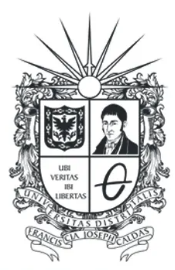

Erick Camilo Torres Rodriguez

20221579037

*Teoria y logica de programación*

---



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se añade la librerias

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Teoría y logíca de programación G-16/Hurtos/Robos.xlsx")
df.shape

(241109, 6)

**1.** la comparación de hurtos entre Medellín, Bogotá y Cali para el año 2020 y sacar tres conclusiones.


       FECHA HECHO  COD_DEPTO     DEPARTAMENTO  COD_MUNI     MUNICIPIO  \
116459  2020-01-01          5        ANTIOQUIA      5001      MEDELLIN   
116486  2020-01-01         11     BOGOTÃ D.C.     11001  BOGOTA, D.C.   
116628  2020-01-01         76  VALLE DEL CAUCA     76001          CALI   
116653  2020-01-02          5        ANTIOQUIA      5001      MEDELLIN   
116677  2020-01-02         11     BOGOTÃ D.C.     11001  BOGOTA, D.C.   
...            ...        ...              ...       ...           ...   
149625  2020-12-30         11     BOGOTÃ D.C.     11001  BOGOTA, D.C.   
149710  2020-12-30         76  VALLE DEL CAUCA     76001          CALI   
149724  2020-12-31          5        ANTIOQUIA      5001      MEDELLIN   
149743  2020-12-31         11     BOGOTÃ D.C.     11001  BOGOTA, D.C.   
149827  2020-12-31         76  VALLE DEL CAUCA     76001          CALI   

        CANTIDAD  
116459        86  
116486       352  
116628        86  
116653       123  
116677       453

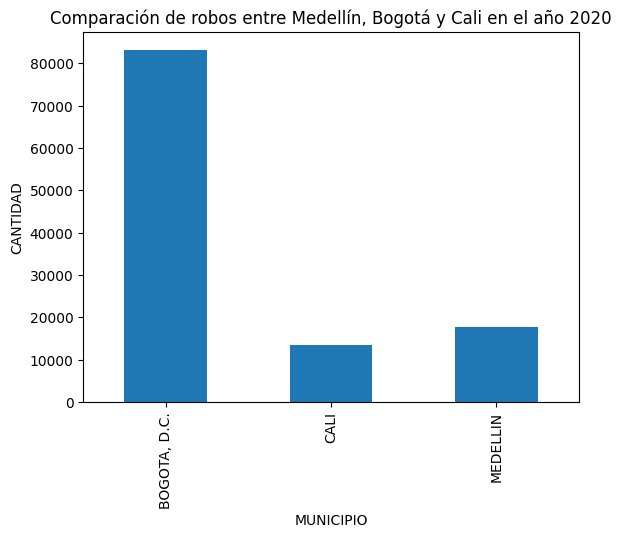

In [6]:
# Filtrar los datos del año 2020 para las ciudades de interés
df_2020 = df[df['FECHA HECHO'].dt.year == 2020]
df_2020 = df_2020[df_2020['MUNICIPIO'].isin(['MEDELLIN', 'BOGOTA, D.C.', 'CALI'])]

# Imprimir el DataFrame para verificar si contiene los datos que se esperan
print(df_2020)

# Calcular el número de robos por ciudad
num_robos = df_2020.groupby('MUNICIPIO')['CANTIDAD'].sum()

# Graficar los resultados
num_robos.plot(kind='bar')
plt.title('Comparación de robos entre Medellín, Bogotá y Cali en el año 2020')
plt.xlabel('MUNICIPIO')
plt.ylabel('CANTIDAD')
plt.show()




*   Bogotá es la ciudad con mas robos, ya que son 80000.
*   Cali entre las 3 ciudades es la ciudad con menos robos en el año 2020.
*   Medellin tiene un par de mies de robos mas que cai y menos de 60000 robos que o que tiene bogotá para el año 2020.




**2.** En cuál departamento, ignorando Bogotá, se presentó más hurtos para marzo 2019.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


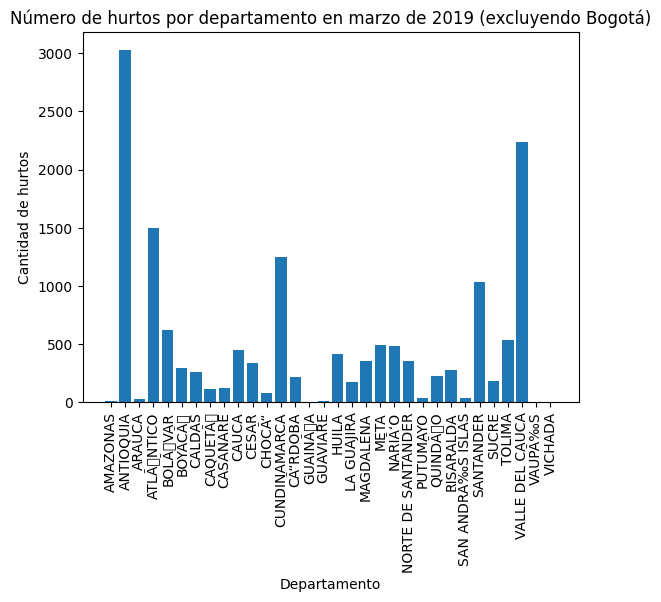

In [17]:
# Filtrar los datos para marzo de 2019, excluyendo Bogotá
df_marzo = df[(df['FECHA HECHO'].dt.month == 3) & (df['FECHA HECHO'].dt.year == 2019) & (df['MUNICIPIO'] != 'BOGOTA, D.C.')]

# Calcular el número de hurtos por departamento
hurtos_por_depto = df_marzo.groupby('DEPARTAMENTO')['CANTIDAD'].sum()

# Encontrar el departamento con el número más alto de hurtos (excluyendo Bogotá)
depto_mas_hurtos = hurtos_por_depto[hurtos_por_depto.index != 'BOGOTA']

# Crear una gráfica de barras
plt.bar(depto_mas_hurtos.index, depto_mas_hurtos.values)
plt.title('Número de hurtos por departamento en marzo de 2019 (excluyendo Bogotá)')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.show()




**3.** cuál fue la cantidad por departamento para el año 2022. Ingresarlo como diccionario y realizar la división a través de Pandas entre cantidad de robos por departamento y municipio. ¿Qué da como resultado esto? Realizar el diagrama que usted considere más conveniente para mostrar los resultados.



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


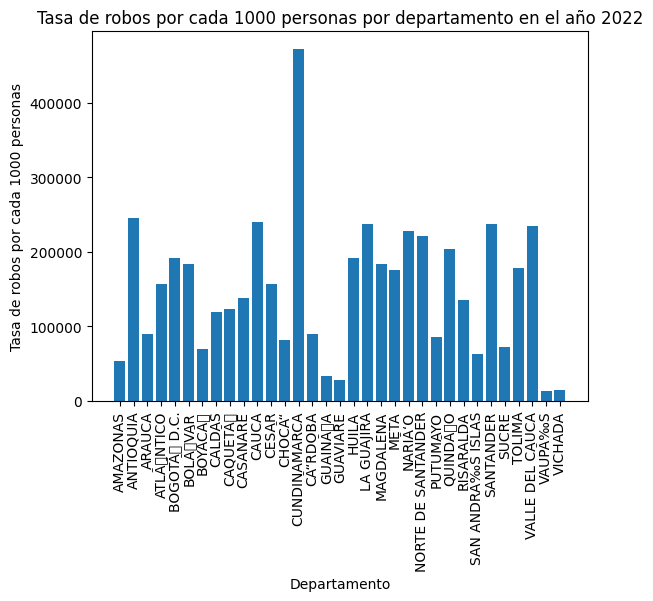

In [16]:
# Filtrar los datos para el año 2022
df_2022 = df[df['FECHA HECHO'].dt.year == 2022]

# Agrupar por departamento y calcular el número total de hurtos
hurtos_por_depto = df_2022.groupby('DEPARTAMENTO')['CANTIDAD'].sum()

# Obtener la población por departamento (suponiendo que está en una columna llamada 'POBLACION')
poblacion_por_depto = df_2022.groupby('DEPARTAMENTO')['CANTIDAD'].max()

# Calcular la tasa de robos por cada 1000 personas
tasa_robos_por_depto = (hurtos_por_depto / poblacion_por_depto)*1000

# Crear una tabla de pandas con los resultados
tabla_tasa_robos_por_depto = pd.DataFrame({'Departamento': tasa_robos_por_depto.index, 'Tasa de robos por cada 1000 personas': tasa_robos_por_depto.values})

# Graficar los resultados
plt.bar(tabla_tasa_robos_por_depto['Departamento'], tabla_tasa_robos_por_depto['Tasa de robos por cada 1000 personas'])
plt.title('Tasa de robos por cada 1000 personas por departamento en el año 2022')
plt.xlabel('Departamento')
plt.ylabel('Tasa de robos por cada 1000 personas')
plt.xticks(rotation=90)
plt.show()
